In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
teams = pd.read_csv('team_stats.csv')
teams.head()

,id,match_won,at_home,match_id,team_id,MP,OPOS,DPOS,FG,FGA,...,ASTP,STLP,BLKP,TOVP,USGP,ORtg,AORtg,DRtg,ADRtg,PLUS_MINUS
0,1,1,1,1,29,NaN,NaN,NaN,41,101,...,48.8,10.5,23.3,7.3,100,106.1,NaN,88.2,NaN,17
1,2,0,0,1,14,NaN,NaN,NaN,32,84,...,53.1,5.3,10.7,16.2,100,88.2,NaN,106.1,NaN,-17
2,3,1,1,2,1,NaN,NaN,NaN,49,88,...,57.1,11.1,8.2,10.9,100,121.8,NaN,105.7,NaN,16
3,4,0,0,2,2,NaN,NaN,NaN,39,80,...,51.3,6.0,10.6,17.9,100,105.7,NaN,121.8,NaN,-16
4,5,1,1,3,12,NaN,NaN,NaN,41,101,...,65.9,7.9,13.6,8.1,100,106.8,NaN,104.8,NaN,2


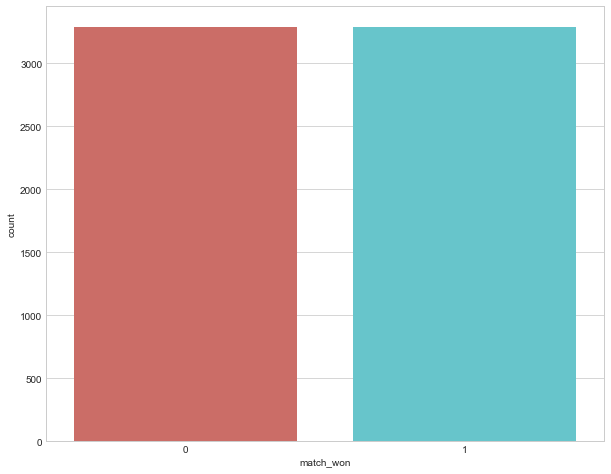

In [3]:
#checking that match_won is binary and that there are an even number of wins and loses 
sb.countplot(x='match_won',data=teams, palette='hls')

In [4]:
#checking for null values
teams.isnull().sum()

id               0
match_won        0
at_home          0
match_id         0
team_id          0
MP            6576
OPOS          6576
DPOS          6576
FG               0
FGA              0
FGP              0
PTS              0
TWO              0
TWOA             0
TWOP             0
TWOAr            0
THR              0
THRA             0
THRP             0
THRAr            0
FT               0
FTA              0
FTP              0
FTAr             0
FT_to_FGA        0
EFGP             0
TSA              0
TSP              0
FIC              0
PACE          6576
ORB              0
ORBr             0
DRB              0
DRBr             0
TRB              0
AST              0
AST_to_TOV       0
STL              0
STL_to_TOV       0
BLK              0
TOV              0
PF               0
ORBP             0
DRBP             0
TRBP             0
ASTP             0
STLP             0
BLKP             0
TOVP             0
USGP             0
ORtg             0
AORtg         6576
DRtg        

In [5]:
#dropping primarily null columns
team_data = teams.drop(['MP','OPOS','DPOS','PACE', 'AORtg', 'ADRtg'], 1)
team_data.head()

,id,match_won,at_home,match_id,team_id,FG,FGA,FGP,PTS,TWO,...,DRBP,TRBP,ASTP,STLP,BLKP,TOVP,USGP,ORtg,DRtg,PLUS_MINUS
0,1,1,1,1,29,41,101,0.405941,101,37,...,69.2,52.5,48.8,10.5,23.3,7.3,100,106.1,88.2,17
1,2,0,0,1,14,32,84,0.380952,84,28,...,60.6,47.5,53.1,5.3,10.7,16.2,100,88.2,106.1,-17
2,3,1,1,2,1,49,88,0.556818,121,41,...,74.3,47.3,57.1,11.1,8.2,10.9,100,121.8,105.7,16
3,4,0,0,2,2,39,80,0.487500,105,32,...,76.9,52.7,51.3,6.0,10.6,17.9,100,105.7,121.8,-16
4,5,1,1,3,12,41,101,0.405941,108,35,...,92.1,58.8,65.9,7.9,13.6,8.1,100,106.8,104.8,2


In [6]:
team_data.isnull().sum()

id            0
match_won     0
at_home       0
match_id      0
team_id       0
FG            0
FGA           0
FGP           0
PTS           0
TWO           0
TWOA          0
TWOP          0
TWOAr         0
THR           0
THRA          0
THRP          0
THRAr         0
FT            0
FTA           0
FTP           0
FTAr          0
FT_to_FGA     0
EFGP          0
TSA           0
TSP           0
FIC           0
ORB           0
ORBr          0
DRB           0
DRBr          0
TRB           0
AST           0
AST_to_TOV    0
STL           0
STL_to_TOV    0
BLK           0
TOV           0
PF            0
ORBP          0
DRBP          0
TRBP          0
ASTP          0
STLP          0
BLKP          0
TOVP          0
USGP          0
ORtg          0
DRtg          0
PLUS_MINUS    0
dtype: int64

In [8]:
#check for correlation coefficents
team_data.corr()

,id,match_won,at_home,match_id,team_id,FG,FGA,FGP,PTS,TWO,...,DRBP,TRBP,ASTP,STLP,BLKP,TOVP,USGP,ORtg,DRtg,PLUS_MINUS
id,1.000000,-4.323160e-05,-0.000263,9.999999e-01,-0.004465,0.126434,0.097383,0.066158,0.183855,-0.018431,...,0.093559,-0.000073,-0.016786,-0.019737,0.026583,-0.063614,NaN,0.115181,0.115245,-5.060421e-05
match_won,-0.000043,1.000000e+00,0.164234,-7.281043e-20,0.054565,0.398670,-0.038983,0.458809,0.469880,0.214673,...,0.088379,0.362109,0.122767,0.148195,0.160078,-0.118078,NaN,0.525197,-0.525197,8.126012e-01
at_home,-0.000263,1.642336e-01,1.000000,0.000000e+00,-0.006117,0.086790,-0.005545,0.096372,0.111162,0.065968,...,0.051983,0.115637,0.079848,0.011468,0.085314,-0.037226,NaN,0.123048,-0.123048,1.922416e-01
match_id,1.000000,-7.281043e-20,0.000000,1.000000e+00,-0.004466,0.126459,0.097385,0.066182,0.183883,-0.018412,...,0.093575,-0.000043,-0.016765,-0.019732,0.026604,-0.063626,NaN,0.115211,0.115211,3.327824e-19
team_id,-0.004465,5.456473e-02,-0.006117,-4.465616e-03,1.000000,0.069646,-0.010804,0.081440,0.094220,0.046831,...,0.022950,0.021003,0.000055,0.054821,0.012411,-0.003431,NaN,0.078577,-0.003566,6.338892e-02
FG,0.126434,3.986701e-01,0.086790,1.264586e-01,0.069646,1.000000,0.436099,0.773553,0.830180,0.757727,...,0.018375,0.239993,0.064533,0.066862,0.040029,-0.219354,NaN,0.730117,0.060671,5.184157e-01
FGA,0.097383,-3.898274e-02,-0.005545,9.738515e-02,-0.010804,0.436099,1.000000,-0.227835,0.276353,0.363149,...,0.077538,0.075099,-0.071432,0.049455,0.014798,-0.451202,NaN,0.024083,0.008911,1.081231e-02
FGP,0.066158,4.588086e-01,0.096372,6.618239e-02,0.081440,0.773553,-0.227835,1.000000,0.702913,0.563303,...,-0.033365,0.208866,0.119360,0.036119,0.032794,0.078665,NaN,0.772685,0.057893,5.532090e-01
PTS,0.183855,4.698802e-01,0.111162,1.838835e-01,0.094220,0.830180,0.276353,0.702913,1.000000,0.457759,...,0.014762,0.266095,0.100730,0.059232,0.035954,-0.194875,NaN,0.860915,0.114260,5.782420e-01
TWO,-0.018431,2.146730e-01,0.065968,-1.841230e-02,0.046831,0.757727,0.363149,0.563303,0.457759,1.000000,...,0.005494,0.193183,-0.129582,0.057551,0.033495,-0.203837,NaN,0.374371,0.029111,2.677633e-01


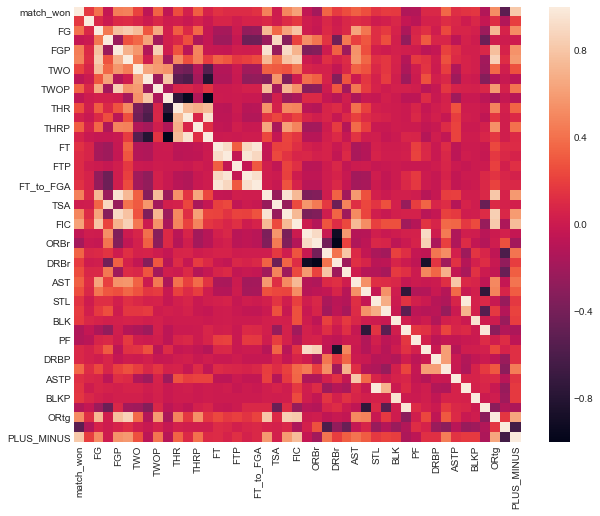

In [53]:
team_f = team_data.drop(['USGP', 'id', 'match_id','team_id'], 1)
sb.heatmap(team_f.corr())

In [54]:
team_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 45 columns):
match_won     6576 non-null int64
at_home       6576 non-null int64
FG            6576 non-null int64
FGA           6576 non-null int64
FGP           6576 non-null float64
PTS           6576 non-null int64
TWO           6576 non-null int64
TWOA          6576 non-null int64
TWOP          6576 non-null float64
TWOAr         6576 non-null float64
THR           6576 non-null int64
THRA          6576 non-null int64
THRP          6576 non-null float64
THRAr         6576 non-null float64
FT            6576 non-null int64
FTA           6576 non-null int64
FTP           6576 non-null float64
FTAr          6576 non-null float64
FT_to_FGA     6576 non-null float64
EFGP          6576 non-null float64
TSA           6576 non-null float64
TSP           6576 non-null float64
FIC           6576 non-null float64
ORB           6576 non-null int64
ORBr          6576 non-null float64
DRB           657

In [62]:
x = team_f.iloc[:,1:44].values
y = team_f.iloc[:,0].values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state=3)

In [68]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
y_pred = LogReg.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[838,   0],
       [  0, 806]])

In [61]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       854
          1       1.00      1.00      1.00       790

avg / total       1.00      1.00      1.00      1644

